## Data Import

In [105]:
import pandas as pd

df = pd.read_csv("BankChurners v3.csv")

In [106]:
df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,F,Uneducated,Single,Less than $40K,Blue,56,4,51,5,1,1,3334.0,1272,2062.0,1.120,4284,73,0.587,0.382
1,1,M,Graduate,Single,$60K - $80K,Blue,44,3,37,5,2,3,1682.0,930,752.0,0.903,3309,67,1.030,0.553
2,1,M,High School,Divorced,$120K +,Blue,53,4,36,3,3,2,34516.0,1337,33179.0,0.704,7919,85,0.635,0.039
3,1,M,Graduate,Married,$80K - $120K,Blue,53,3,40,2,2,3,16747.0,0,16747.0,0.801,4350,76,0.767,0.000
4,0,M,Uneducated,Married,$80K - $120K,Blue,40,3,29,3,2,3,3616.0,1151,2465.0,0.687,820,21,0.750,0.318


In [107]:
# df = df.drop(df.columns[0], axis = 1)

In [108]:
X = df.drop(df.columns[0], axis=1)
X.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,F,Uneducated,Single,Less than $40K,Blue,56,4,51,5,1,1,3334.0,1272,2062.0,1.120,4284,73,0.587,0.382
1,M,Graduate,Single,$60K - $80K,Blue,44,3,37,5,2,3,1682.0,930,752.0,0.903,3309,67,1.030,0.553
2,M,High School,Divorced,$120K +,Blue,53,4,36,3,3,2,34516.0,1337,33179.0,0.704,7919,85,0.635,0.039
3,M,Graduate,Married,$80K - $120K,Blue,53,3,40,2,2,3,16747.0,0,16747.0,0.801,4350,76,0.767,0.000
4,M,Uneducated,Married,$80K - $120K,Blue,40,3,29,3,2,3,3616.0,1151,2465.0,0.687,820,21,0.750,0.318


In [109]:
Y = df[df.columns[0]].astype('int')
Y[:3]

0    1
1    1
2    1
Name: Attrition_Flag, dtype: int64

### Check the Outliers with DBSCAN algorithm

In [110]:
print(X.shape)
np.unique(X.dtypes)

(3206, 19)


array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [111]:
X_float = X.select_dtypes(np.unique(X.dtypes)[0:2])
X_float.shape

(3206, 14)

In [112]:
X_str = X.select_dtypes(np.unique(X.dtypes)[2])
X_str.shape


(3206, 5)

In [113]:
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN

DM = cdist(X_float, X_float)
np.quantile(DM, 0.06)

1731.3718225511236

In [114]:
cluster_model = DBSCAN(eps = 1760, min_samples = 5).fit(X_float)
print(sum(cluster_model.labels_ == -1)) 

0


In [115]:
X = X[cluster_model.labels_ != -1]
Y = Y[cluster_model.labels_ != -1]
X_float = X.select_dtypes(np.unique(X.dtypes)[0:2])
X_str = X.select_dtypes(np.unique(X.dtypes)[2])


X_float.shape, X_str.shape

((3206, 14), (3206, 5))

## MinMaxScaler

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_float)
X_float = pd.DataFrame(scaler.transform(X_float), columns=X_float.columns)
X_float.shape

(3206, 14)

## Categorical Data

In [117]:
for col in X_str.columns:
    print(col, len(X_str[col].unique()))

Gender 2
Education_Level 6
Marital_Status 3
Income_Category 5
Card_Category 4


In [96]:
# !pip3 install feature-engine

In [118]:
from feature_engine.encoding import OneHotEncoder as OHE

dummy_model = OHE(variables = X_str.columns.tolist(),
                 drop_last = False)
dummy_model.fit(X_str)
X_dummy = dummy_model.transform(X_str)

In [119]:
X_dummy.reset_index(inplace=True)

In [120]:
X_dummy = X_dummy.drop(X_dummy.columns[0], axis=1)

In [121]:
X = pd.concat([X_float, X_dummy], axis=1)

In [122]:
X.shape

(3206, 34)

In [123]:
X.isnull().sum(axis = 0)

Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_F                          0
Gender_M                          0
Education_Level_Uneducated        0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_College           0
Education_Level_Post-Graduate     0
Education_Level_Doctorate         0
Marital_Status_Single             0
Marital_Status_Divorced           0
Marital_Status_Married            0
Income_Category_Less than $40K    0
Income_Category_$60K - $80K       0
Income_Category_$120K +     

In [124]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Married,Income_Category_Less than $40K,Income_Category_$60K - $80K,Income_Category_$120K +,Income_Category_$80K - $120K,Income_Category_$40K - $60K,Card_Category_Blue,Card_Category_Silver,Card_Category_Gold,Card_Category_Platinum
0,1.194566,1.284221,1.869805,0.876109,-1.517670,-1.454375,-0.555089,0.338850,-0.588161,1.733819,...,0,1,0,0,0,0,1,0,0,0
1,-0.330483,0.503263,0.109795,0.876109,-0.492459,0.310138,-0.739584,-0.043223,-0.734263,0.766232,...,0,0,1,0,0,0,1,0,0,0
2,0.813304,1.284221,-0.015920,-0.385425,0.532751,-0.572118,2.927305,0.411467,2.882246,-0.121093,...,0,0,0,1,0,0,1,0,0,0
3,0.813304,0.503263,0.486940,-1.016192,-0.492459,0.310138,0.942870,-1.082194,1.049623,0.311422,...,1,0,0,0,1,0,1,0,0,0
4,-0.838832,0.503263,-0.895925,-0.385425,-0.492459,0.310138,-0.523595,0.203673,-0.543216,-0.196895,...,1,0,0,0,1,0,1,0,0,0


In [125]:
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_Uneducated',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_College', 'Education_Level_Post-Graduate',
       'Education_Level_Doctorate', 'Marital_Status_Single',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Income_Category_Less than $40K', 'Income_Category_$60K - $80K',
       'Income_Category_$120K +', 'Income_Category_$80K - $120K',
       'Income_Category_$40K - $60K', 'Card_Category_Blue',
       'Card_Category_Silver', 'Card_Category_Gold', 'Card_Category_Platinum'],
      dtype='object')

## 1. Logistic Regression

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=1234)

In [127]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(C=0.1, solver= 'lbfgs', max_iter=5000).fit(X_train, Y_train)

In [128]:
print('Train Accuracy : ', model.score(X_train, Y_train))
print('Test Accuracy : ',model.score(X_test, Y_test))

Train Accuracy :  0.8596256684491979
Test Accuracy :  0.8440748440748441


In [129]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, Y_train, scoring="accuracy", cv=5).mean()

0.8525035793827552

### Hyperparameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=30,
            solver='lbfgs'
          )

param_grid = {
    'max_iter': np.linspace(500, 5000, 10),
    'C': np.linspace(0, 2, 20),
}
grid_reg = GridSearchCV(model, param_grid=param_grid,
                         cv=5, refit=True, return_train_score=True)

grid_reg.fit(X_train, Y_train)
scores_df = pd.DataFrame(grid_reg.cv_results_)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:123: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:128: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packa

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.85161271 0.85161271
 0.85161271 0.85161271 0.85161271 0.85161271 0.85161271 0.85161271
 0.85161271 0.85161271 0.85339644 0.85339644 0.85339644 0.85339644
 0.85339644 0.85339644 0.85339644 0.85339644 0.85339644 0.85339644
 0.85072284 0.85072284 0.85072284 0.85072284 0.85072284 0.85072284
 0.85072284 0.85072284 0.85072284 0.85072284 0.84938455 0.84938455
 0.84938455 0.84938455 0.84938455 0.84938455 0.84938455 0.84938455
 0.84938455 0.84938455 0.84849467 0.84849467 0.84849467 0.84849467
 0.84849467 0.84849467 0.84849467 0.84849467 0.84849467 0.84849467
 0.84804824 0.84804824 0.84804824 0.84804824 0.84804824 0.84804824
 0.84804824 0.84804824 0.84804824 0.84804824 0.8489401  0.8489401
 0.8489401  0.8489401  0.8489401  

In [131]:
grid_reg.best_estimator_

LogisticRegression(C=0.21052631578947367, max_iter=500.0, random_state=30)

In [138]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(C=0.210526, solver= 'lbfgs', max_iter=500).fit(X_train, Y_train)
cross_val_score(model, X_test, Y_test, scoring="accuracy", cv=5).mean()

0.8420174870466323

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

confusion_matrix(Y_test, y_pred)

array([[401,  77],
       [ 76, 408]])

In [140]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       478
           1       0.84      0.84      0.84       484

    accuracy                           0.84       962
   macro avg       0.84      0.84      0.84       962
weighted avg       0.84      0.84      0.84       962



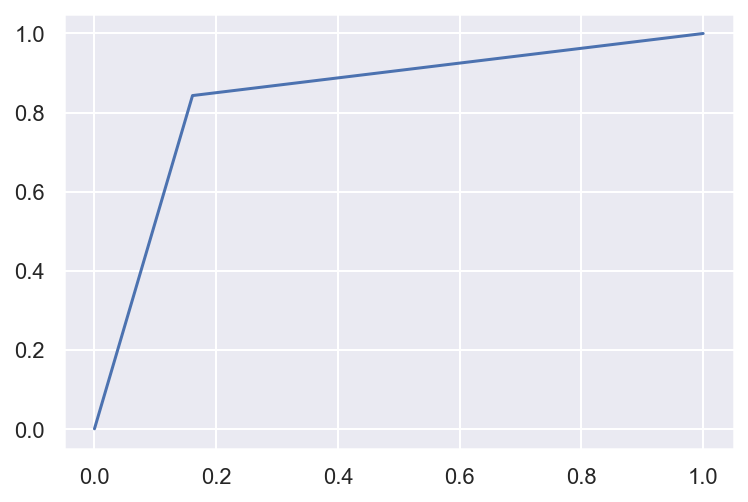

In [136]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

### Lasso Regression

In [172]:
np.linspace(0.1, 0.4, 50)

array([0.1       , 0.10612245, 0.1122449 , 0.11836735, 0.1244898 ,
       0.13061224, 0.13673469, 0.14285714, 0.14897959, 0.15510204,
       0.16122449, 0.16734694, 0.17346939, 0.17959184, 0.18571429,
       0.19183673, 0.19795918, 0.20408163, 0.21020408, 0.21632653,
       0.22244898, 0.22857143, 0.23469388, 0.24081633, 0.24693878,
       0.25306122, 0.25918367, 0.26530612, 0.27142857, 0.27755102,
       0.28367347, 0.28979592, 0.29591837, 0.30204082, 0.30816327,
       0.31428571, 0.32040816, 0.32653061, 0.33265306, 0.33877551,
       0.34489796, 0.35102041, 0.35714286, 0.36326531, 0.36938776,
       0.3755102 , 0.38163265, 0.3877551 , 0.39387755, 0.4       ])

In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l1', solver='liblinear')

param_grid = {
    'max_iter': np.linspace(500, 5000, 10),
    'C': np.linspace(0.2, 0.4, 50)
}
grid_reg = GridSearchCV(model, param_grid=param_grid,
                         cv=5, refit=True, return_train_score=True)

grid_reg.fit(X_train, Y_train)
scores_df = pd.DataFrame(grid_reg.cv_results_)

In [177]:
grid_reg.best_estimator_

LogisticRegression(C=0.3510204081632653, max_iter=500.0, penalty='l1',
                   solver='liblinear')

In [492]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(C=0.3510204081632653, penalty='l1',max_iter=500, solver='liblinear').fit(X_train, Y_train)
cross_val_score(model, X_test, Y_test, scoring="accuracy", cv=5).mean()

0.85375

In [493]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

confusion_matrix(Y_test, y_pred)

array([[129,  20],
       [ 27, 145]])

In [495]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       149
           1       0.88      0.84      0.86       172

    accuracy                           0.85       321
   macro avg       0.85      0.85      0.85       321
weighted avg       0.85      0.85      0.85       321



In [500]:
coef_table = pd.DataFrame(data=d)
coef_table[coef_table['coef_']==0]

,colnames,coef_
8,Avg_Open_To_Buy,0.0
19,Education_Level_College,0.0
22,Marital_Status_Single,0.0
25,Income_Category_Less than $40K,0.0
28,Income_Category_$80K - $120K,0.0
30,Card_Category_Blue,0.0
31,Card_Category_Silver,0.0
33,Card_Category_Platinum,0.0


In [182]:
model.coef_

array([[ 1.29675691e-01, -1.04438619e-01,  5.33803493e-02,
         5.48926000e-01, -4.96375483e-01, -6.21945894e-01,
         1.02246595e-01,  5.84703612e-01,  0.00000000e+00,
         9.70788787e-02, -1.59669384e+00,  2.77964386e+00,
         6.71342676e-01,  1.44012162e-01, -4.25105265e-01,
         9.99296299e-02, -3.08023336e-02,  4.99157297e-03,
         3.76902607e-02,  0.00000000e+00, -3.48111831e-01,
        -6.34658691e-02,  0.00000000e+00, -1.23205329e-03,
         5.10151492e-01,  0.00000000e+00,  1.08122538e-01,
        -2.42262514e-01,  0.00000000e+00,  5.78533067e-03,
         0.00000000e+00,  0.00000000e+00, -2.51728555e-01,
         0.00000000e+00]])

## 2. Support Vector Machine

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=1234)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = SVC(kernel="poly").fit(X_train, Y_train)

param_grid = {
    'degree': [2, 3, 4], 
    'gamma': np.linspace(0, 1, 20),
    'C': np.linspace(0.5, 5, 5),3
}
grid_reg = GridSearchCV(model, param_grid=param_grid,
                         cv=5, refit=True, return_train_score=True)

grid_reg.fit(X_train, Y_train)
scores_df = pd.DataFrame(grid_reg.cv_results_)

KeyboardInterrupt: 

In [46]:
from sklearn.svm import SVC
model1 = SVC(kernel="poly", degree=3, gamma=0.07).fit(X_train , Y_train)

from sklearn.metrics import classification_report
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       478
           1       0.88      0.92      0.90       484

    accuracy                           0.89       962
   macro avg       0.89      0.89      0.89       962
weighted avg       0.89      0.89      0.89       962



In [59]:
from sklearn.svm import SVC
model1 = SVC(kernel="rbf", gamma=0.1, C=3).fit(X_train , Y_train)

from sklearn.metrics import classification_report
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       478
           1       0.90      0.92      0.91       484

    accuracy                           0.91       962
   macro avg       0.91      0.91      0.91       962
weighted avg       0.91      0.91      0.91       962



In [66]:
from sklearn.svm import SVC
model1 = SVC(kernel="sigmoid", gamma=0.01, C=1).fit(X_train , Y_train)

from sklearn.metrics import classification_report
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       478
           1       0.85      0.84      0.84       484

    accuracy                           0.84       962
   macro avg       0.84      0.84      0.84       962
weighted avg       0.84      0.84      0.84       962



#### With Beyesian Optimization

In [201]:
from sklearn.svm import SVC

In [205]:
X_train.shape

(2244, 34)

In [206]:
Y_train.shape

(2244,)

In [211]:
def train_acc(C_value, gamma_value):
    
    svc_final = SVC(kernel= 'rbf' ,gamma = gamma_value , C = C_value , random_state=1234)
    svc_final.fit(X_train, Y_train)
    
   # Validation
    y_pred = svc_final.predict(X_test)
    acc= svc_final.score(X_test, Y_test)
    
    return acc

In [212]:
from bayes_opt import BayesianOptimization

pbounds = {'C_value': (0.01, 10) , 'gamma_value': (0.01, 10) } 

optimizer = BayesianOptimization(
    f=train_acc ,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 500 ) 

|   iter    |  target   |  C_value  | gamma_... |
-------------------------------------------------
|  1        |  0.4969   |  4.176    |  7.206    |
|  2        |  0.4969   |  0.01114  |  3.03     |
|  3        |  0.8347   |  1.476    |  0.9325   |
|  4        |  0.4969   |  1.871    |  3.462    |
|  5        |  0.4969   |  3.974    |  5.393    |
|  6        |  0.8919   |  1.624    |  0.2968   |
|  7        |  0.8857   |  4.957    |  0.01     |
|  8        |  0.8992   |  10.0     |  0.01     |
|  9        |  0.4969   |  10.0     |  4.315    |
|  10       |  0.8919   |  7.709    |  0.01     |
|  11       |  0.4969   |  10.0     |  10.0     |
|  12       |  0.7505   |  0.01     |  0.01     |
|  13       |  0.8836   |  3.147    |  0.01     |
|  14       |  0.4969   |  0.01     |  10.0     |
|  15       |  0.5187   |  6.367    |  1.493    |
|  16       |  0.9075   |  8.923    |  0.07764  |
|  17       |  0.6435   |  9.995    |  1.072    |
|  18       |  0.4969   |  6.026    |  10.0     |


|  100      |  0.8981   |  9.545    |  0.1783   |
|  101      |  0.9054   |  5.307    |  0.1281   |
|  102      |  0.9012   |  5.378    |  0.03466  |
|  103      |  0.4969   |  10.0     |  8.598    |
|  104      |  0.501    |  4.879    |  1.888    |
|  105      |  0.4969   |  7.089    |  8.723    |
|  106      |  0.4969   |  3.106    |  8.422    |
|  107      |  0.4969   |  5.135    |  4.487    |
|  108      |  0.9002   |  5.609    |  0.1841   |
|  109      |  0.8285   |  9.651    |  0.4901   |
|  110      |  0.9033   |  6.135    |  0.1642   |
|  111      |  0.8659   |  8.99     |  0.3951   |
|  112      |  0.9044   |  5.175    |  0.07467  |
|  113      |  0.4969   |  2.992    |  6.542    |
|  114      |  0.9012   |  3.382    |  0.17     |
|  115      |  0.9023   |  3.696    |  0.2022   |
|  116      |  0.8659   |  0.9603   |  0.01     |
|  117      |  0.4969   |  7.041    |  6.005    |
|  118      |  0.4969   |  4.49     |  10.0     |
|  119      |  0.9012   |  2.159    |  0.1668   |


|  200      |  0.9064   |  6.064    |  0.04867  |
|  201      |  0.8992   |  3.917    |  0.05193  |
|  202      |  0.9044   |  5.498    |  0.07912  |
|  203      |  0.9085   |  3.793    |  0.1299   |
|  204      |  0.9075   |  9.007    |  0.07709  |
|  205      |  0.9044   |  7.199    |  0.09255  |
|  206      |  0.9096   |  2.875    |  0.1302   |
|  207      |  0.9054   |  6.055    |  0.1072   |
|  208      |  0.9002   |  6.324    |  0.1466   |
|  209      |  0.8909   |  3.333    |  0.2711   |
|  210      |  0.9044   |  2.808    |  0.112    |
|  211      |  0.4969   |  0.05215  |  5.831    |
|  212      |  0.4969   |  8.929    |  7.49     |
|  213      |  0.501    |  2.5      |  1.904    |
|  214      |  0.499    |  1.011    |  2.841    |
|  215      |  0.4969   |  2.932    |  5.222    |
|  216      |  0.4969   |  4.581    |  6.107    |
|  217      |  0.4969   |  4.152    |  4.296    |
|  218      |  0.4969   |  2.27     |  9.128    |
|  219      |  0.5      |  5.717    |  2.365    |


|  300      |  0.4969   |  6.171    |  4.032    |
|  301      |  0.9054   |  5.693    |  0.1315   |
|  302      |  0.8971   |  0.8327   |  0.1288   |
|  303      |  0.8971   |  7.16     |  0.1806   |
|  304      |  0.8534   |  6.802    |  0.4317   |
|  305      |  0.8992   |  7.394    |  0.2226   |
|  306      |  0.9085   |  3.339    |  0.08286  |
|  307      |  0.9044   |  2.451    |  0.1439   |
|  308      |  0.8992   |  9.591    |  0.01     |
|  309      |  0.501    |  8.018    |  2.259    |
|  310      |  0.9085   |  4.636    |  0.1073   |
|  311      |  0.9023   |  1.893    |  0.1434   |
|  312      |  0.5      |  2.024    |  2.66     |
|  313      |  0.8929   |  2.217    |  0.2537   |
|  314      |  0.9075   |  6.15     |  0.09042  |
|  315      |  0.817    |  9.331    |  0.5289   |
|  316      |  0.9064   |  4.2      |  0.08602  |
|  317      |  0.9012   |  2.648    |  0.1872   |
|  318      |  0.8909   |  9.853    |  0.299    |
|  319      |  0.9044   |  4.625    |  0.05829  |


|  400      |  0.9064   |  4.485    |  0.1054   |
|  401      |  0.9023   |  8.08     |  0.09385  |
|  402      |  0.9075   |  5.614    |  0.09402  |
|  403      |  0.8857   |  0.8221   |  0.2874   |
|  404      |  0.9054   |  4.238    |  0.141    |
|  405      |  0.8825   |  9.465    |  0.3225   |
|  406      |  0.9044   |  5.378    |  0.1378   |
|  407      |  0.9054   |  3.27     |  0.1012   |
|  408      |  0.8773   |  2.146    |  0.01     |
|  409      |  0.4969   |  3.525    |  4.745    |
|  410      |  0.8971   |  8.407    |  0.03516  |
|  411      |  0.4969   |  2.849    |  5.886    |
|  412      |  0.4969   |  9.04     |  5.696    |
|  413      |  0.4969   |  1.468    |  7.147    |
|  414      |  0.5582   |  4.57     |  1.276    |
|  415      |  0.4969   |  9.011    |  4.56     |
|  416      |  0.4969   |  7.726    |  8.489    |
|  417      |  0.4969   |  0.7094   |  6.853    |
|  418      |  0.4969   |  7.64     |  2.961    |
|  419      |  0.4969   |  7.397    |  9.419    |


|  500      |  0.8981   |  3.48     |  0.2262   |
|  501      |  0.9075   |  3.438    |  0.1106   |
|  502      |  0.8888   |  6.913    |  0.01     |
|  503      |  0.9033   |  3.219    |  0.1619   |
|  504      |  0.5198   |  8.527    |  1.472    |
|  505      |  0.8773   |  3.184    |  0.3524   |


In [217]:
from sklearn.metrics import classification_report

model1 = SVC(kernel="rbf", gamma=0.105, C=5.43).fit(X_train , Y_train)
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       478
           1       0.91      0.91      0.91       484

    accuracy                           0.91       962
   macro avg       0.91      0.91      0.91       962
weighted avg       0.91      0.91      0.91       962



## 3. Neural Net

In [367]:
X.shape

(3206, 34)

In [68]:
from tensorflow import keras
keras.__version__

'2.6.0'

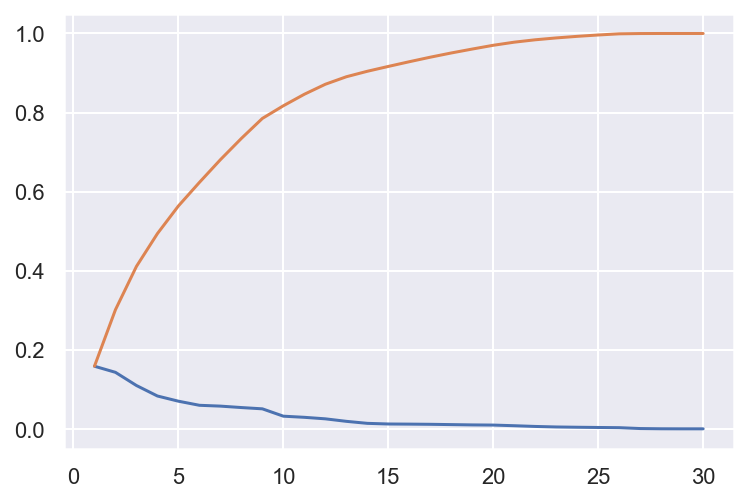

In [232]:
from sklearn.decomposition import PCA
n=30
pca = PCA(n_components=n)
pca_result = pca.fit_transform(X_train)

x = [i for i in range(1,n+1)]
plt.plot(x, pca.explained_variance_ratio_)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))

In [388]:
n=20
pca = PCA(n_components=n)
pca_result = pca.fit_transform(X)

In [389]:
dimensions = ['Components {}'.format(i) for i in range(len(pca.components_))]
dimensions

['Components 0',
 'Components 1',
 'Components 2',
 'Components 3',
 'Components 4',
 'Components 5',
 'Components 6',
 'Components 7',
 'Components 8',
 'Components 9',
 'Components 10',
 'Components 11',
 'Components 12',
 'Components 13',
 'Components 14',
 'Components 15',
 'Components 16',
 'Components 17',
 'Components 18',
 'Components 19']

In [390]:
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(X.keys()))
components.index = dimensions
components.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Married,Income_Category_Less than $40K,Income_Category_$60K - $80K,Income_Category_$120K +,Income_Category_$80K - $120K,Income_Category_$40K - $60K,Card_Category_Blue,Card_Category_Silver,Card_Category_Gold,Card_Category_Platinum
Components 0,0.0124,0.0355,0.0158,-0.0781,0.0078,0.0599,0.5666,-0.1745,0.5833,0.0226,...,-0.0281,-0.1460,0.0327,0.0618,0.0822,-0.0308,-0.0706,0.0564,0.0120,0.0022
Components 1,-0.1713,0.0266,-0.1682,-0.0153,-0.1765,-0.2098,0.0478,0.3007,0.0178,0.2771,...,-0.0108,0.0087,-0.0035,-0.0066,-0.0011,0.0025,-0.0143,0.0106,0.0035,0.0002
Components 2,0.6446,-0.2104,0.6498,-0.0398,0.1779,-0.1120,0.0308,0.1381,0.0170,0.0819,...,-0.0054,-0.0013,-0.0072,0.0078,0.0099,-0.0092,-0.0015,0.0028,-0.0014,0.0002
Components 3,0.0339,-0.0266,0.0427,-0.2926,0.0631,0.0068,-0.2930,-0.5947,-0.2332,0.0033,...,-0.0207,0.1122,-0.0305,-0.0366,-0.0596,0.0145,0.0256,-0.0212,-0.0047,0.0002
Components 4,-0.0193,-0.2718,-0.0287,0.5006,-0.0428,0.0065,-0.0646,-0.2585,-0.0387,0.5507,...,0.0109,-0.0072,0.0254,-0.0060,-0.0123,-0.0000,0.0160,-0.0108,-0.0046,-0.0006


[Text(0, 0, 'Components 0'),
 Text(1, 0, 'Components 1'),
 Text(2, 0, 'Components 2'),
 Text(3, 0, 'Components 3'),
 Text(4, 0, 'Components 4'),
 Text(5, 0, 'Components 5'),
 Text(6, 0, 'Components 6'),
 Text(7, 0, 'Components 7'),
 Text(8, 0, 'Components 8'),
 Text(9, 0, 'Components 9'),
 Text(10, 0, 'Components 10'),
 Text(11, 0, 'Components 11'),
 Text(12, 0, 'Components 12'),
 Text(13, 0, 'Components 13'),
 Text(14, 0, 'Components 14'),
 Text(15, 0, 'Components 15'),
 Text(16, 0, 'Components 16'),
 Text(17, 0, 'Components 17'),
 Text(18, 0, 'Components 18'),
 Text(19, 0, 'Components 19')]

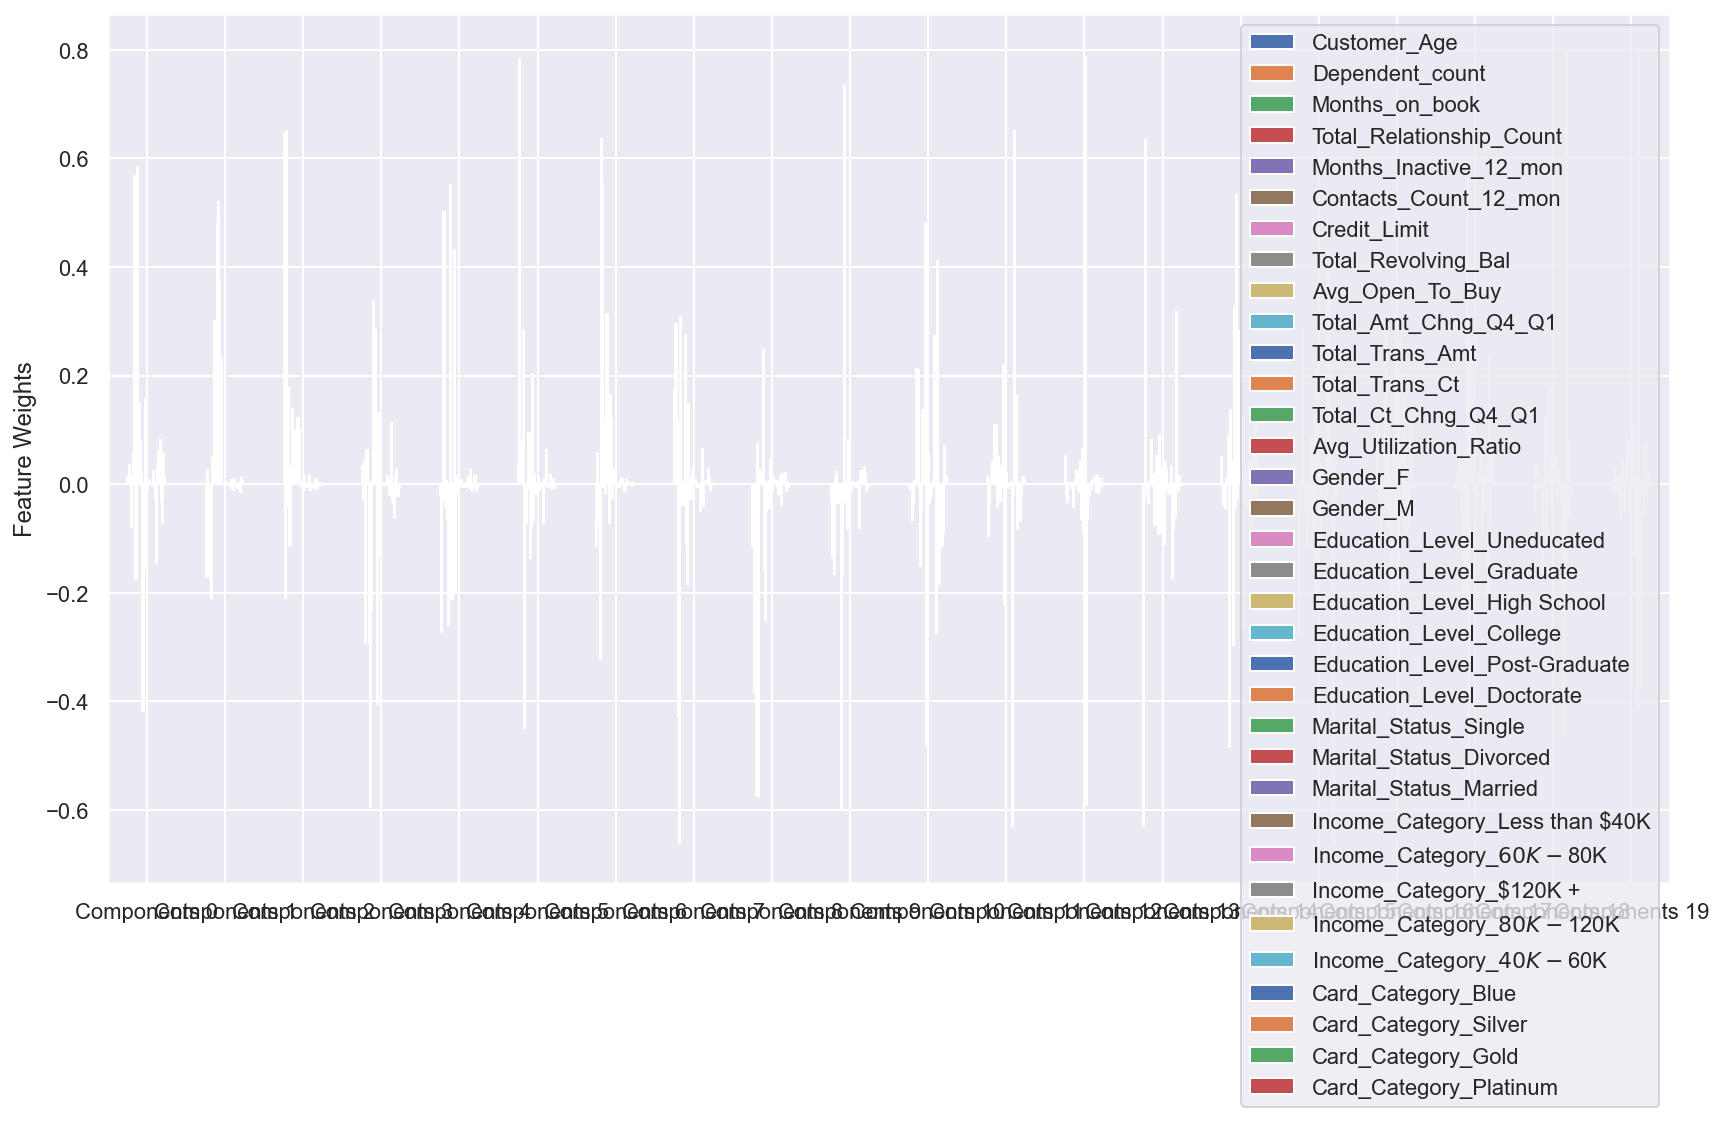

In [391]:
_, ax = plt.subplots(figsize = (14,8))


components.plot(ax = ax, kind = 'bar')
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)

In [392]:
X_nn = pca.fit_transform(X)

In [450]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_nn, Y.values, test_size=0.1, random_state=344)

In [451]:
X_train.shape

(2885, 20)

In [484]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout



model3 = Sequential()
model3.add(Dense(10, input_dim=20, activation="relu"))
model3.add(Dense(10, activation="relu"))
#model3.add(Dense(10, activation="relu"))
#model3.add(Dropout(0.3))
#model3.add(Dropout(0.2, input_shape = (15,)))
model3.add(Dense(1, activation="relu"))
#model3.add(Dropout(0.2, input_shape = (15,)))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [485]:
%%time
hist = model3.fit(X_train, Y_train,
                 epochs=1200, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Epoch 1/1200
29/29 - 0s - loss: 1.8732 - accuracy: 0.5584 - val_loss: 1.4558 - val_accuracy: 0.5763
Epoch 2/1200
29/29 - 0s - loss: 1.2910 - accuracy: 0.6291 - val_loss: 1.1174 - val_accuracy: 0.6075
Epoch 3/1200
29/29 - 0s - loss: 1.0162 - accuracy: 0.6634 - val_loss: 0.9187 - val_accuracy: 0.6199
Epoch 4/1200
29/29 - 0s - loss: 0.9004 - accuracy: 0.6745 - val_loss: 0.8405 - val_accuracy: 0.6262
Epoch 5/1200
29/29 - 0s - loss: 0.7900 - accuracy: 0.6887 - val_loss: 0.8083 - val_accuracy: 0.6667
Epoch 6/1200
29/29 - 0s - loss: 0.7313 - accuracy: 0.7061 - val_loss: 0.7774 - val_accuracy: 0.6667
Epoch 7/1200
29/29 - 0s - loss: 0.6760 - accuracy: 0.7158 - val_loss: 0.7153 - val_accuracy: 0.6760
Epoch 8/1200
29/29 - 0s - loss: 0.6401 - accuracy: 0.7331 - val_loss: 0.6861 - val_accuracy: 0.6791
Epoch 9/1200
29/29 - 0s - loss: 0.6109 - accuracy: 0.7407 - val_loss: 0.6306 - val_accuracy: 0.6978
Epoch 10/1200
29/29 - 0s - loss: 0.6169 - accuracy: 0.7428 - val_loss: 0.6131 - val_accuracy: 0.7196

Epoch 83/1200
29/29 - 0s - loss: 0.3117 - accuracy: 0.8672 - val_loss: 0.3212 - val_accuracy: 0.8505
Epoch 84/1200
29/29 - 0s - loss: 0.3098 - accuracy: 0.8686 - val_loss: 0.3234 - val_accuracy: 0.8505
Epoch 85/1200
29/29 - 0s - loss: 0.3079 - accuracy: 0.8683 - val_loss: 0.3226 - val_accuracy: 0.8505
Epoch 86/1200
29/29 - 0s - loss: 0.3058 - accuracy: 0.8693 - val_loss: 0.3219 - val_accuracy: 0.8474
Epoch 87/1200
29/29 - 0s - loss: 0.3042 - accuracy: 0.8707 - val_loss: 0.3226 - val_accuracy: 0.8474
Epoch 88/1200
29/29 - 0s - loss: 0.3027 - accuracy: 0.8714 - val_loss: 0.3223 - val_accuracy: 0.8474
Epoch 89/1200
29/29 - 0s - loss: 0.3014 - accuracy: 0.8714 - val_loss: 0.3314 - val_accuracy: 0.8474
Epoch 90/1200
29/29 - 0s - loss: 0.3000 - accuracy: 0.8711 - val_loss: 0.3367 - val_accuracy: 0.8474
Epoch 91/1200
29/29 - 0s - loss: 0.2989 - accuracy: 0.8718 - val_loss: 0.3516 - val_accuracy: 0.8474
Epoch 92/1200
29/29 - 0s - loss: 0.2981 - accuracy: 0.8721 - val_loss: 0.3506 - val_accurac

Epoch 164/1200
29/29 - 0s - loss: 0.2497 - accuracy: 0.8912 - val_loss: 0.3544 - val_accuracy: 0.8723
Epoch 165/1200
29/29 - 0s - loss: 0.2490 - accuracy: 0.8925 - val_loss: 0.3577 - val_accuracy: 0.8723
Epoch 166/1200
29/29 - 0s - loss: 0.2481 - accuracy: 0.8922 - val_loss: 0.3601 - val_accuracy: 0.8723
Epoch 167/1200
29/29 - 0s - loss: 0.2473 - accuracy: 0.8925 - val_loss: 0.3881 - val_accuracy: 0.8723
Epoch 168/1200
29/29 - 0s - loss: 0.2471 - accuracy: 0.8929 - val_loss: 0.3881 - val_accuracy: 0.8723
Epoch 169/1200
29/29 - 0s - loss: 0.2461 - accuracy: 0.8939 - val_loss: 0.3894 - val_accuracy: 0.8723
Epoch 170/1200
29/29 - 0s - loss: 0.2454 - accuracy: 0.8936 - val_loss: 0.3900 - val_accuracy: 0.8723
Epoch 171/1200
29/29 - 0s - loss: 0.2447 - accuracy: 0.8943 - val_loss: 0.3896 - val_accuracy: 0.8723
Epoch 172/1200
29/29 - 0s - loss: 0.2442 - accuracy: 0.8939 - val_loss: 0.3913 - val_accuracy: 0.8723
Epoch 173/1200
29/29 - 0s - loss: 0.2434 - accuracy: 0.8957 - val_loss: 0.3913 - v

Epoch 245/1200
29/29 - 0s - loss: 0.2162 - accuracy: 0.9054 - val_loss: 0.5705 - val_accuracy: 0.8847
Epoch 246/1200
29/29 - 0s - loss: 0.2172 - accuracy: 0.9071 - val_loss: 0.6037 - val_accuracy: 0.8785
Epoch 247/1200
29/29 - 0s - loss: 0.2164 - accuracy: 0.9068 - val_loss: 0.6044 - val_accuracy: 0.8785
Epoch 248/1200
29/29 - 0s - loss: 0.2160 - accuracy: 0.9064 - val_loss: 0.6024 - val_accuracy: 0.8816
Epoch 249/1200
29/29 - 0s - loss: 0.2156 - accuracy: 0.9061 - val_loss: 0.6067 - val_accuracy: 0.8816
Epoch 250/1200
29/29 - 0s - loss: 0.2152 - accuracy: 0.9054 - val_loss: 0.6032 - val_accuracy: 0.8754
Epoch 251/1200
29/29 - 0s - loss: 0.2151 - accuracy: 0.9071 - val_loss: 0.5767 - val_accuracy: 0.8785
Epoch 252/1200
29/29 - 0s - loss: 0.2145 - accuracy: 0.9071 - val_loss: 0.6036 - val_accuracy: 0.8785
Epoch 253/1200
29/29 - 0s - loss: 0.2150 - accuracy: 0.9050 - val_loss: 0.5755 - val_accuracy: 0.8816
Epoch 254/1200
29/29 - 0s - loss: 0.2138 - accuracy: 0.9078 - val_loss: 0.6037 - v

Epoch 326/1200
29/29 - 0s - loss: 0.1918 - accuracy: 0.9175 - val_loss: 0.6282 - val_accuracy: 0.8910
Epoch 327/1200
29/29 - 0s - loss: 0.1915 - accuracy: 0.9179 - val_loss: 0.5976 - val_accuracy: 0.8972
Epoch 328/1200
29/29 - 0s - loss: 0.1910 - accuracy: 0.9161 - val_loss: 0.6303 - val_accuracy: 0.8910
Epoch 329/1200
29/29 - 0s - loss: 0.1907 - accuracy: 0.9196 - val_loss: 0.6684 - val_accuracy: 0.8847
Epoch 330/1200
29/29 - 0s - loss: 0.1915 - accuracy: 0.9161 - val_loss: 0.6026 - val_accuracy: 0.8910
Epoch 331/1200
29/29 - 0s - loss: 0.1903 - accuracy: 0.9185 - val_loss: 0.5957 - val_accuracy: 0.8910
Epoch 332/1200
29/29 - 0s - loss: 0.1905 - accuracy: 0.9158 - val_loss: 0.6646 - val_accuracy: 0.8910
Epoch 333/1200
29/29 - 0s - loss: 0.1896 - accuracy: 0.9206 - val_loss: 0.6329 - val_accuracy: 0.8941
Epoch 334/1200
29/29 - 0s - loss: 0.1897 - accuracy: 0.9168 - val_loss: 0.6284 - val_accuracy: 0.8910
Epoch 335/1200
29/29 - 0s - loss: 0.1895 - accuracy: 0.9185 - val_loss: 0.6631 - v

Epoch 407/1200
29/29 - 0s - loss: 0.1712 - accuracy: 0.9224 - val_loss: 0.6568 - val_accuracy: 0.9034
Epoch 408/1200
29/29 - 0s - loss: 0.1704 - accuracy: 0.9220 - val_loss: 0.6572 - val_accuracy: 0.9003
Epoch 409/1200
29/29 - 0s - loss: 0.1701 - accuracy: 0.9227 - val_loss: 0.6570 - val_accuracy: 0.9003
Epoch 410/1200
29/29 - 0s - loss: 0.1701 - accuracy: 0.9244 - val_loss: 0.6559 - val_accuracy: 0.9003
Epoch 411/1200
29/29 - 0s - loss: 0.1698 - accuracy: 0.9244 - val_loss: 0.6577 - val_accuracy: 0.9003
Epoch 412/1200
29/29 - 0s - loss: 0.1692 - accuracy: 0.9231 - val_loss: 0.6547 - val_accuracy: 0.9034
Epoch 413/1200
29/29 - 0s - loss: 0.1682 - accuracy: 0.9231 - val_loss: 0.6585 - val_accuracy: 0.9003
Epoch 414/1200
29/29 - 0s - loss: 0.1689 - accuracy: 0.9234 - val_loss: 0.6583 - val_accuracy: 0.9003
Epoch 415/1200
29/29 - 0s - loss: 0.1677 - accuracy: 0.9234 - val_loss: 0.6559 - val_accuracy: 0.9003
Epoch 416/1200
29/29 - 0s - loss: 0.1681 - accuracy: 0.9244 - val_loss: 0.6652 - v

Epoch 488/1200
29/29 - 0s - loss: 0.1597 - accuracy: 0.9286 - val_loss: 0.7001 - val_accuracy: 0.9065
Epoch 489/1200
29/29 - 0s - loss: 0.1592 - accuracy: 0.9279 - val_loss: 0.7039 - val_accuracy: 0.9065
Epoch 490/1200
29/29 - 0s - loss: 0.1586 - accuracy: 0.9282 - val_loss: 0.7005 - val_accuracy: 0.9065
Epoch 491/1200
29/29 - 0s - loss: 0.1596 - accuracy: 0.9296 - val_loss: 0.6731 - val_accuracy: 0.9065
Epoch 492/1200
29/29 - 0s - loss: 0.1585 - accuracy: 0.9289 - val_loss: 0.7024 - val_accuracy: 0.9034
Epoch 493/1200
29/29 - 0s - loss: 0.1583 - accuracy: 0.9300 - val_loss: 0.6986 - val_accuracy: 0.9065
Epoch 494/1200
29/29 - 0s - loss: 0.1587 - accuracy: 0.9282 - val_loss: 0.6995 - val_accuracy: 0.9065
Epoch 495/1200
29/29 - 0s - loss: 0.1585 - accuracy: 0.9276 - val_loss: 0.6998 - val_accuracy: 0.9065
Epoch 496/1200
29/29 - 0s - loss: 0.1587 - accuracy: 0.9276 - val_loss: 0.7021 - val_accuracy: 0.9065
Epoch 497/1200
29/29 - 0s - loss: 0.1590 - accuracy: 0.9282 - val_loss: 0.7008 - v

Epoch 569/1200
29/29 - 0s - loss: 0.2397 - accuracy: 0.9269 - val_loss: 0.6524 - val_accuracy: 0.8941
Epoch 570/1200
29/29 - 0s - loss: 0.3835 - accuracy: 0.9064 - val_loss: 0.6790 - val_accuracy: 0.8660
Epoch 571/1200
29/29 - 0s - loss: 0.3745 - accuracy: 0.9061 - val_loss: 0.6633 - val_accuracy: 0.8847
Epoch 572/1200
29/29 - 0s - loss: 0.3396 - accuracy: 0.9092 - val_loss: 0.7457 - val_accuracy: 0.8847
Epoch 573/1200
29/29 - 0s - loss: 0.3516 - accuracy: 0.9068 - val_loss: 0.7591 - val_accuracy: 0.8941
Epoch 574/1200
29/29 - 0s - loss: 0.3461 - accuracy: 0.9099 - val_loss: 0.7184 - val_accuracy: 0.8941
Epoch 575/1200
29/29 - 0s - loss: 0.3411 - accuracy: 0.9133 - val_loss: 0.7127 - val_accuracy: 0.8910
Epoch 576/1200
29/29 - 0s - loss: 0.3174 - accuracy: 0.9151 - val_loss: 0.6645 - val_accuracy: 0.8910
Epoch 577/1200
29/29 - 0s - loss: 0.2958 - accuracy: 0.9175 - val_loss: 0.6313 - val_accuracy: 0.8847
Epoch 578/1200
29/29 - 0s - loss: 0.2870 - accuracy: 0.9182 - val_loss: 0.6334 - v

Epoch 650/1200
29/29 - 0s - loss: 0.2217 - accuracy: 0.9241 - val_loss: 0.6025 - val_accuracy: 0.9034
Epoch 651/1200
29/29 - 0s - loss: 0.2214 - accuracy: 0.9241 - val_loss: 0.6027 - val_accuracy: 0.9034
Epoch 652/1200
29/29 - 0s - loss: 0.2212 - accuracy: 0.9244 - val_loss: 0.6032 - val_accuracy: 0.9065
Epoch 653/1200
29/29 - 0s - loss: 0.2213 - accuracy: 0.9244 - val_loss: 0.6020 - val_accuracy: 0.9034
Epoch 654/1200
29/29 - 0s - loss: 0.2210 - accuracy: 0.9255 - val_loss: 0.6026 - val_accuracy: 0.9034
Epoch 655/1200
29/29 - 0s - loss: 0.2208 - accuracy: 0.9251 - val_loss: 0.6015 - val_accuracy: 0.9065
Epoch 656/1200
29/29 - 0s - loss: 0.2205 - accuracy: 0.9251 - val_loss: 0.6027 - val_accuracy: 0.9034
Epoch 657/1200
29/29 - 0s - loss: 0.2206 - accuracy: 0.9248 - val_loss: 0.6023 - val_accuracy: 0.9034
Epoch 658/1200
29/29 - 0s - loss: 0.2204 - accuracy: 0.9258 - val_loss: 0.6021 - val_accuracy: 0.9065
Epoch 659/1200
29/29 - 0s - loss: 0.2201 - accuracy: 0.9258 - val_loss: 0.6018 - v

Epoch 731/1200
29/29 - 0s - loss: 0.1876 - accuracy: 0.9296 - val_loss: 0.6011 - val_accuracy: 0.9065
Epoch 732/1200
29/29 - 0s - loss: 0.1880 - accuracy: 0.9282 - val_loss: 0.6011 - val_accuracy: 0.9097
Epoch 733/1200
29/29 - 0s - loss: 0.1874 - accuracy: 0.9293 - val_loss: 0.6016 - val_accuracy: 0.9065
Epoch 734/1200
29/29 - 0s - loss: 0.1872 - accuracy: 0.9289 - val_loss: 0.6017 - val_accuracy: 0.9065
Epoch 735/1200
29/29 - 0s - loss: 0.1871 - accuracy: 0.9289 - val_loss: 0.6022 - val_accuracy: 0.9065
Epoch 736/1200
29/29 - 0s - loss: 0.1870 - accuracy: 0.9303 - val_loss: 0.6020 - val_accuracy: 0.9065
Epoch 737/1200
29/29 - 0s - loss: 0.1869 - accuracy: 0.9303 - val_loss: 0.6011 - val_accuracy: 0.9065
Epoch 738/1200
29/29 - 0s - loss: 0.1869 - accuracy: 0.9296 - val_loss: 0.6006 - val_accuracy: 0.9097
Epoch 739/1200
29/29 - 0s - loss: 0.1866 - accuracy: 0.9296 - val_loss: 0.6015 - val_accuracy: 0.9065
Epoch 740/1200
29/29 - 0s - loss: 0.1864 - accuracy: 0.9303 - val_loss: 0.6022 - v

Epoch 812/1200
29/29 - 0s - loss: 0.1785 - accuracy: 0.9352 - val_loss: 0.6502 - val_accuracy: 0.9159
Epoch 813/1200
29/29 - 0s - loss: 0.1782 - accuracy: 0.9355 - val_loss: 0.6522 - val_accuracy: 0.9190
Epoch 814/1200
29/29 - 0s - loss: 0.1786 - accuracy: 0.9345 - val_loss: 0.6830 - val_accuracy: 0.9159
Epoch 815/1200
29/29 - 0s - loss: 0.1780 - accuracy: 0.9362 - val_loss: 0.6821 - val_accuracy: 0.9190
Epoch 816/1200
29/29 - 0s - loss: 0.1783 - accuracy: 0.9348 - val_loss: 0.6818 - val_accuracy: 0.9190
Epoch 817/1200
29/29 - 0s - loss: 0.1778 - accuracy: 0.9352 - val_loss: 0.6567 - val_accuracy: 0.9159
Epoch 818/1200
29/29 - 0s - loss: 0.1780 - accuracy: 0.9352 - val_loss: 0.6817 - val_accuracy: 0.9190
Epoch 819/1200
29/29 - 0s - loss: 0.1778 - accuracy: 0.9359 - val_loss: 0.6878 - val_accuracy: 0.9159
Epoch 820/1200
29/29 - 0s - loss: 0.1788 - accuracy: 0.9362 - val_loss: 0.6812 - val_accuracy: 0.9159
Epoch 821/1200
29/29 - 0s - loss: 0.1779 - accuracy: 0.9345 - val_loss: 0.6859 - v

Epoch 893/1200
29/29 - 0s - loss: 0.2356 - accuracy: 0.9338 - val_loss: 0.6864 - val_accuracy: 0.9097
Epoch 894/1200
29/29 - 0s - loss: 0.2245 - accuracy: 0.9359 - val_loss: 0.6850 - val_accuracy: 0.9128
Epoch 895/1200
29/29 - 0s - loss: 0.2036 - accuracy: 0.9341 - val_loss: 0.7415 - val_accuracy: 0.9034
Epoch 896/1200
29/29 - 0s - loss: 0.1992 - accuracy: 0.9345 - val_loss: 0.7768 - val_accuracy: 0.9034
Epoch 897/1200
29/29 - 0s - loss: 0.1760 - accuracy: 0.9373 - val_loss: 0.7249 - val_accuracy: 0.9128
Epoch 898/1200
29/29 - 0s - loss: 0.1722 - accuracy: 0.9369 - val_loss: 0.7233 - val_accuracy: 0.9065
Epoch 899/1200
29/29 - 0s - loss: 0.1702 - accuracy: 0.9369 - val_loss: 0.7277 - val_accuracy: 0.9065
Epoch 900/1200
29/29 - 0s - loss: 0.1689 - accuracy: 0.9376 - val_loss: 0.7202 - val_accuracy: 0.9065
Epoch 901/1200
29/29 - 0s - loss: 0.1683 - accuracy: 0.9376 - val_loss: 0.7207 - val_accuracy: 0.9097
Epoch 902/1200
29/29 - 0s - loss: 0.1679 - accuracy: 0.9393 - val_loss: 0.7199 - v

Epoch 974/1200
29/29 - 0s - loss: 0.1622 - accuracy: 0.9421 - val_loss: 0.6767 - val_accuracy: 0.9128
Epoch 975/1200
29/29 - 0s - loss: 0.1636 - accuracy: 0.9397 - val_loss: 0.7181 - val_accuracy: 0.9128
Epoch 976/1200
29/29 - 0s - loss: 0.1618 - accuracy: 0.9414 - val_loss: 0.7288 - val_accuracy: 0.9128
Epoch 977/1200
29/29 - 0s - loss: 0.1611 - accuracy: 0.9438 - val_loss: 0.7236 - val_accuracy: 0.9097
Epoch 978/1200
29/29 - 0s - loss: 0.1611 - accuracy: 0.9414 - val_loss: 0.6841 - val_accuracy: 0.9097
Epoch 979/1200
29/29 - 0s - loss: 0.1612 - accuracy: 0.9432 - val_loss: 0.7258 - val_accuracy: 0.9097
Epoch 980/1200
29/29 - 0s - loss: 0.1604 - accuracy: 0.9421 - val_loss: 0.6901 - val_accuracy: 0.9034
Epoch 981/1200
29/29 - 0s - loss: 0.1609 - accuracy: 0.9425 - val_loss: 0.7286 - val_accuracy: 0.9128
Epoch 982/1200
29/29 - 0s - loss: 0.1612 - accuracy: 0.9435 - val_loss: 0.7197 - val_accuracy: 0.9097
Epoch 983/1200
29/29 - 0s - loss: 0.1612 - accuracy: 0.9421 - val_loss: 0.7259 - v

Epoch 1054/1200
29/29 - 0s - loss: 0.1571 - accuracy: 0.9456 - val_loss: 0.6924 - val_accuracy: 0.9097
Epoch 1055/1200
29/29 - 0s - loss: 0.1562 - accuracy: 0.9459 - val_loss: 0.7330 - val_accuracy: 0.9065
Epoch 1056/1200
29/29 - 0s - loss: 0.1576 - accuracy: 0.9463 - val_loss: 0.7466 - val_accuracy: 0.9065
Epoch 1057/1200
29/29 - 0s - loss: 0.1560 - accuracy: 0.9445 - val_loss: 0.7281 - val_accuracy: 0.9097
Epoch 1058/1200
29/29 - 0s - loss: 0.1557 - accuracy: 0.9459 - val_loss: 0.6957 - val_accuracy: 0.9065
Epoch 1059/1200
29/29 - 0s - loss: 0.1565 - accuracy: 0.9438 - val_loss: 0.7037 - val_accuracy: 0.9065
Epoch 1060/1200
29/29 - 0s - loss: 0.1556 - accuracy: 0.9456 - val_loss: 0.7403 - val_accuracy: 0.9065
Epoch 1061/1200
29/29 - 0s - loss: 0.1566 - accuracy: 0.9438 - val_loss: 0.7342 - val_accuracy: 0.9065
Epoch 1062/1200
29/29 - 0s - loss: 0.1561 - accuracy: 0.9466 - val_loss: 0.6947 - val_accuracy: 0.9065
Epoch 1063/1200
29/29 - 0s - loss: 0.1554 - accuracy: 0.9452 - val_loss: 

Epoch 1134/1200
29/29 - 0s - loss: 0.1564 - accuracy: 0.9470 - val_loss: 0.7442 - val_accuracy: 0.9034
Epoch 1135/1200
29/29 - 0s - loss: 0.1557 - accuracy: 0.9463 - val_loss: 0.8125 - val_accuracy: 0.9065
Epoch 1136/1200
29/29 - 0s - loss: 0.1551 - accuracy: 0.9484 - val_loss: 0.7502 - val_accuracy: 0.9034
Epoch 1137/1200
29/29 - 0s - loss: 0.1556 - accuracy: 0.9487 - val_loss: 0.7804 - val_accuracy: 0.9034
Epoch 1138/1200
29/29 - 0s - loss: 0.1568 - accuracy: 0.9473 - val_loss: 0.7466 - val_accuracy: 0.9003
Epoch 1139/1200
29/29 - 0s - loss: 0.1550 - accuracy: 0.9480 - val_loss: 0.7698 - val_accuracy: 0.9034
Epoch 1140/1200
29/29 - 0s - loss: 0.1559 - accuracy: 0.9477 - val_loss: 0.7331 - val_accuracy: 0.9065
Epoch 1141/1200
29/29 - 0s - loss: 0.1557 - accuracy: 0.9484 - val_loss: 0.7334 - val_accuracy: 0.9065
Epoch 1142/1200
29/29 - 0s - loss: 0.1551 - accuracy: 0.9497 - val_loss: 0.7753 - val_accuracy: 0.9097
Epoch 1143/1200
29/29 - 0s - loss: 0.1554 - accuracy: 0.9480 - val_loss: 

In [486]:
model3.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_227 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_228 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_229 (Dense)            (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


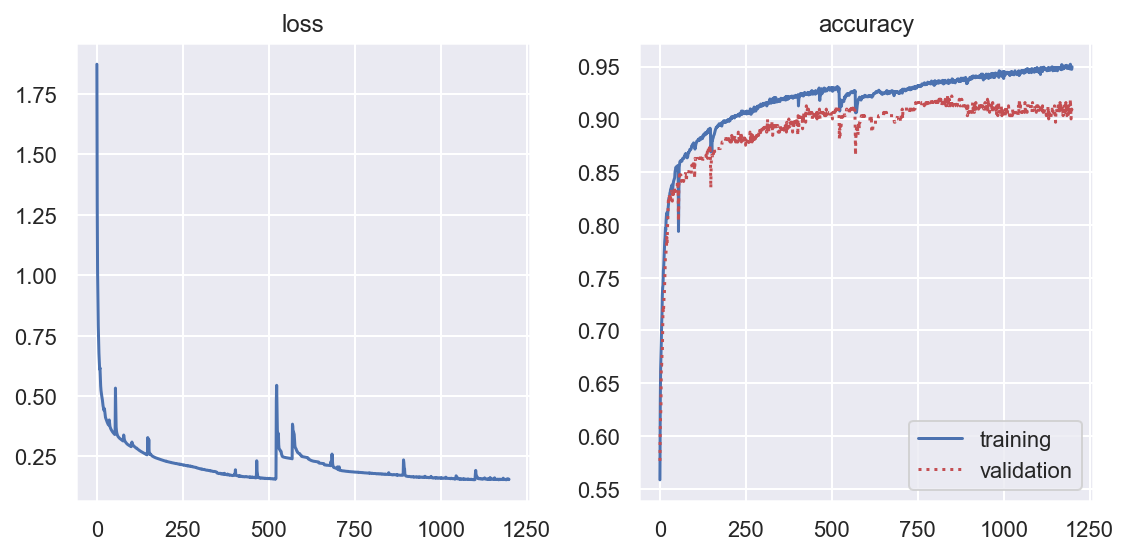

In [487]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

In [488]:
test_predictions = model3.predict(X_test)

In [489]:
prediction_labels = []
for i in test_predictions:
    if i >= 0.5:
        prediction_labels.append(1)
    else:
        prediction_labels.append(0)

In [490]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, prediction_labels))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       149
           1       0.92      0.91      0.91       172

    accuracy                           0.91       321
   macro avg       0.91      0.91      0.91       321
weighted avg       0.91      0.91      0.91       321

